In [3]:
import numpy as np
import pandas as pd
import json, glob
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  calinski_harabasz_score
from sklearn import metrics
import scipy.cluster.hierarchy as sch

from google.colab import drive
drive.mount('/content/drive')

from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, dendrogram

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path_base = './drive/My Drive/CS235Project/DF_Outputs'
X_file = glob.glob(f'{path_base}/DF_text_processed_V2.csv')
X = pd.read_csv(X_file[0])

In [5]:
X.head()


,Unnamed: 0,paper_id,doi,abstract,body_text,authors,title,journal,language,processed_abstract,processed_body_text
0,4127,a5d0b34f30d76d6f680291733e307106bd40078d,10.1016/j.antiviral.2013.11.006,The SARS (severe acute respiratory syndrome) p...,Coronaviruses are ubiquitous viruses infecting...,"Subissi, Lorenzo. Imbert, Isabelle. Ferron, ...",SARS-CoV ORF1b-encoded nonstructural proteins ...,Antiviral Research,en,sars severe acute respiratory syndrome pandemi...,coronaviruses ubiquitous virus infect large va...
1,14448,58b03ddec1bad21055ed4ca08df9ad08f9fd650c,10.1016/j.meegid.2014.06.005,"Porcine epidemic diarrhea virus (PEDV), a memb...",Porcine epidemic diarrhea virus (PEDV) is a me...,"Choi, Jong-Chul. Lee, Kun-Kyu. Pi, Jae Ho. ...",Comparative genome analysis and molecular epid...,"Infection, Genetics and Evolution",en,porcine epidemic diarrhea virus pedv member co...,porcine epidemic diarrhea virus pedv member fa...
2,27523,9fae9474725400c9be6f28818e571b7adb3ceba6,10.1007/s12250-011-3194-9,Ebola virus infection causes severe hemorrhagi...,Ebola viruses are enveloped viruses with an ~1...,"Wang, Jizhen. Manicassamy, Balaji. Caffrey, ...",Characterization of the receptor-binding domai...,Virol Sin,en,ebola virus infection cause severe hemorrhagic...,ebola virus envelop virus ~19 kb single-strand...
3,21028,d92e305bcea5be1e84643b9998c81c70ba72b6b4,10.1007/s13364-013-0138-9,Invasive wildlife species have the potential t...,"In recent years, awareness for wildlife diseas...","Sutor, Astrid. Schwarz, Sabine. Conraths, Fr...",The biological potential of the raccoon dog (N...,Acta Theriol (Warsz),en,invasive wildlife species potential act additi...,recent year awareness wildlife disease increas...
4,9678,84564b1c4576582020f42d649003950aaf9f55ca,10.1016/j.jcv.2018.05.006,Background: Influenza (FLUV) and human respira...,Acute respiratory infections (ARI) represent a...,"Gimferrer, Laura. Andrés, Cristina. Rando, A...",Evaluation of Seegene Allplex Respiratory Pane...,Journal of Clinical Virology,en,background influenza fluv human respiratory sy...,acute respiratory infection ari represent majo...


In [0]:
body_text = X['body_text']
abstract_text = X['abstract']
titles=X['title']

In [7]:
print(titles)

0       SARS-CoV ORF1b-encoded nonstructural proteins ...
1       Comparative genome analysis and molecular epid...
2       Characterization of the receptor-binding domai...
3       The biological potential of the raccoon dog (N...
4       Evaluation of Seegene Allplex Respiratory Pane...
                              ...                        
9995    Virus Variation Resource – improved response t...
9996    99mTc-radiolabeled Levofloxacin and micelles a...
9997    DETECTION OF NON-INFLUENZA VIRUSES IN ACUTE RE...
9998    Generation of antibody- and B cell-deficient p...
9999    Epidemiology of travel-associated infections i...
Name: title, Length: 10000, dtype: object


In [8]:
body_text

0       Coronaviruses are ubiquitous viruses infecting...
1       Porcine epidemic diarrhea virus (PEDV) is a me...
2       Ebola viruses are enveloped viruses with an ~1...
3       In recent years, awareness for wildlife diseas...
4       Acute respiratory infections (ARI) represent a...
                              ...                        
9995    Genome sequences have the potential to define ...
9996    The diagnosis of infections with the help of r...
9997    Acute respiratory infections (ARI) are a real ...
9998    Humoral versus cellular immunity Á Human polyc...
9999    Epidemiology of travel-associated infections i...
Name: body_text, Length: 10000, dtype: object

In [9]:
abstract_text

0       The SARS (severe acute respiratory syndrome) p...
1       Porcine epidemic diarrhea virus (PEDV), a memb...
2       Ebola virus infection causes severe hemorrhagi...
3       Invasive wildlife species have the potential t...
4       Background: Influenza (FLUV) and human respira...
                              ...                        
9995    The Virus Variation Resource is a value-added ...
9996    A B S T R A C T Easy and early detection of in...
9997    Background: Influenza sentinel surveillance in...
9998    A poly(A)-trap gene targeting strategy was use...
9999    Background: The number of travelers in Oman ha...
Name: abstract, Length: 10000, dtype: object

In [0]:
def tf_idf_vectorizer(text, maxx_features): 
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    terms = vectorizer.get_feature_names()
    print (X)
    return X

In [11]:
abs_text = X['body_text'].values
df_abs = tf_idf_vectorizer(abs_text, 2 ** 12)
df_abs.shape


  (0, 3543)	0.005585266736973063
  (0, 3272)	0.004965717800969013
  (0, 608)	0.004960606402916814
  (0, 3746)	0.003908489230823978
  (0, 1771)	0.006341040506143356
  (0, 2481)	0.0031082936330037547
  (0, 2030)	0.0064326217707257015
  (0, 2252)	0.005953925748386526
  (0, 3476)	0.005939889533007236
  (0, 1393)	0.0055737946364840365
  (0, 3973)	0.006170633990684396
  (0, 1568)	0.004773529202011544
  (0, 246)	0.006550922437328883
  (0, 1429)	0.010703995227590777
  (0, 2215)	0.005771403163753731
  (0, 40)	0.002228669651807809
  (0, 845)	0.009862479803499895
  (0, 1914)	0.005681257616305639
  (0, 1217)	0.005436177081113545
  (0, 1029)	0.0034473638759900008
  (0, 2716)	0.007205741123663413
  (0, 926)	0.005020799355359458
  (0, 3184)	0.004351183855832925
  (0, 579)	0.005790624344078947
  (0, 2896)	0.005582391929855965
  :	:
  (9999, 1637)	0.044810531451595484
  (9999, 382)	0.299080943312926
  (9999, 4060)	0.03086975622640601
  (9999, 2800)	0.009837830414003651
  (9999, 1972)	0.0044478399494572

(10000, 4096)

In [12]:
text = X['abstract'].values
df_abs = tf_idf_vectorizer(text, 2 ** 9)
df_abs.shape


  (0, 219)	0.05436863156216187
  (0, 213)	0.07346461603983734
  (0, 0)	0.06255623919050275
  (0, 290)	0.0933934985428435
  (0, 190)	0.03536914908241864
  (0, 54)	0.07753416632502563
  (0, 329)	0.0845535518100608
  (0, 508)	0.08041081526856242
  (0, 490)	0.04211657697648925
  (0, 301)	0.05694519322543587
  (0, 317)	0.05798150579718613
  (0, 431)	0.0833022149738963
  (0, 206)	0.04347869416620121
  (0, 29)	0.0712391232490637
  (0, 453)	0.05437870337662255
  (0, 178)	0.07196307925219377
  (0, 489)	0.0497925266480072
  (0, 321)	0.0525088888344537
  (0, 504)	0.027523712921564424
  (0, 101)	0.17693575437238604
  (0, 459)	0.08395094717305508
  (0, 217)	0.07892393471961982
  (0, 39)	0.04987389822823139
  (0, 474)	0.055210765459554736
  (0, 343)	0.08058262233087822
  :	:
  (9999, 242)	0.05836549314036511
  (9999, 57)	0.045536412211264414
  (9999, 390)	0.11391407599394837
  (9999, 451)	0.037617847555057794
  (9999, 45)	0.07263707801576631
  (9999, 496)	0.13774236816927266
  (9999, 185)	0.03399166

(10000, 512)

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100)
X_TSNE = tsne.fit_transform(df_abs.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.327s...
[t-SNE] Computed neighbors for 10000 samples in 116.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.273036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.081863
[t-SNE] KL divergence after 1000 iterations: 2.663399


In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100)
X_abs_TSNE = tsne.fit_transform(df_abs.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.536s...
[t-SNE] Computed neighbors for 10000 samples in 126.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.273036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.372444
[t-SNE] KL divergence after 1000 iterations: 2.676357


In [0]:
np.savetxt("X_TSNE.csv", X_TSNE, delimiter=",")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


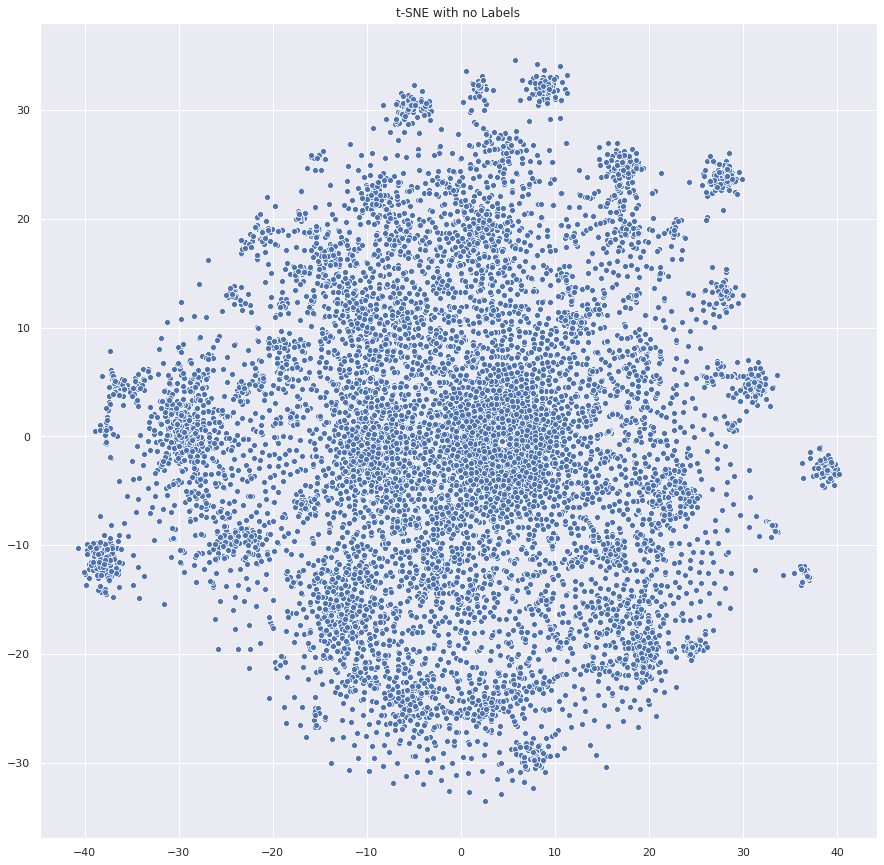

In [16]:
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_TSNE[:,0], X_TSNE[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.show()



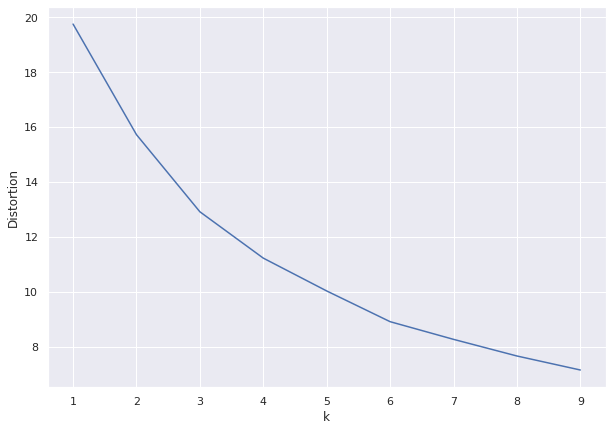

In [47]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(1,10)
for k in K:
  kmean = KMeans(n_clusters=k).fit(X_TSNE)
  kmean.fit(X_TSNE)
  distortions.append(sum(np.min(cdist(X_TSNE, kmean.cluster_centers_, 'euclidean'), axis=1)) / X_TSNE.shape[0])

plt.figure(figsize=(10, 7))  
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title='The Elbow Method showing the optimal k'
plt.show()

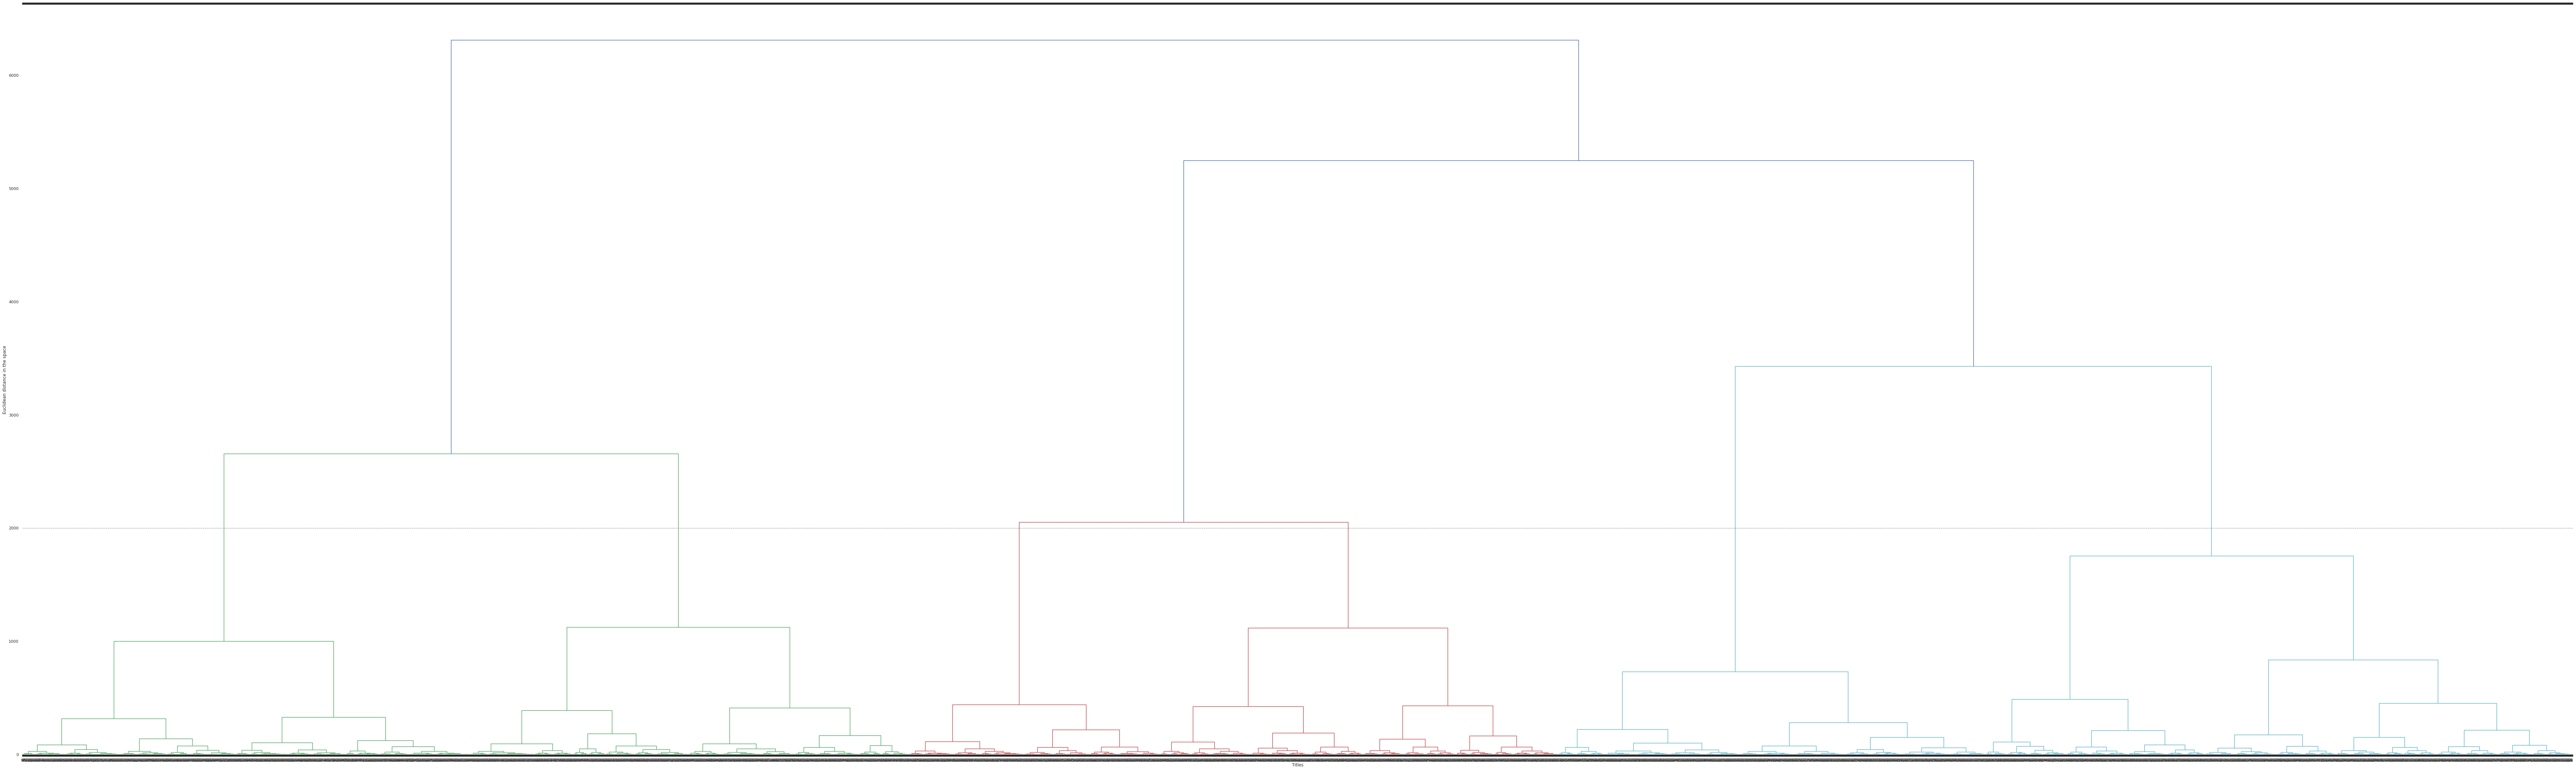

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

dist = 1 - cosine_similarity(X_TSNE)
print


linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
MAX_COPHENETIC_DIST = max(linkage_matrix[:,2]) * 0.39

fig, ax = plt.subplots(figsize=(100, 30)) # set size
# ax = dendrogram(linkage_matrix, orientation="left")
ax=dendrogram(linkage_matrix, color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=4)
plt.axhline(y=2000, c='grey', lw=1, linestyle='dashed')
plt.tick_params(axis= 'x', which='both',  bottom='off', top='off',labelbottom='off')
plt.xlabel('Titles')
plt.ylabel('Euclidean distance in the space');
plt.tight_layout()

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200)

In [0]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6,affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_TSNE)
labels=cluster.labels_

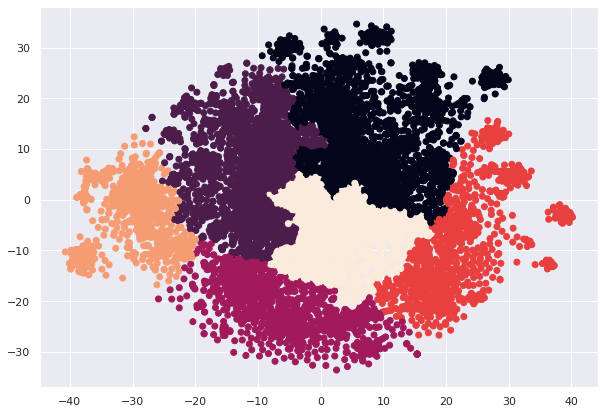

In [55]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=cluster.labels_) 
plt.title='t-sne with HAC labels'

In [56]:
silhouette_score(X_TSNE,labels)

0.29728892

In [57]:
calinski_harabasz_score(X_TSNE,labels)

6153.839004171112